In [ ]:
https://zhuanlan.zhihu.com/p/211166108
购买1股股票，同时出售该股票的1股看涨期权的组合被称为“抛补性看涨期权”。
抛出看涨期权所承担的到期出售股票的潜在义务，可以被组合中持有的股票抵补，
不需要另外补进股票。

抛补性看涨期权(covered call)

抛补：ST-S0  +  C-Max(ST-K,0)

     股票多头 +  欧式看涨期权的空头(如果ST>K，期权多方行权；反之不行权)

ST:期权到期日基础资产的价格
S0:策略构建日的基础资产的价格
K：期权的执行价格
C：策略构建日看涨期权的价格

In [ ]:
【案例分析1】A机构需要运用沪深300ETF期权构建抛补性看涨期权策略，
策略中的看涨期权是运用在2020年12月23日到期的执行价格为4元的
沪深300ETF认购期权，期权的价格是0.2元，基础资产是沪深300ETF基金。
策略构建当天1份沪深300ETF基金的净值是3.8630元，沪深300指数点位
是3872.7701。A机构将运用10000份沪深300ETF基金多头头寸和1张
沪深300指数ETF认购期权空头头寸构建买入抛补性看涨期权的策略，画出盈亏图。

【注】为了算标的资产的盈亏我们需要计算基金到期时的净值，可以假设沪深300ETF
基金与其标的沪深300指数之间的跟踪误差为0，根据到期时的指数点数来换算，
比如到期指数5000点，那么净值就是5000×3.8630/3872.7701；同时一张期权
的基础资产是10000份沪深300ETF基金，算期权盈亏时要乘10000。以上均不考虑
交易手续费用。

①假定沪深300指数跌至3000点：

单位净值=3000×3.8630/3872.7701=2.992



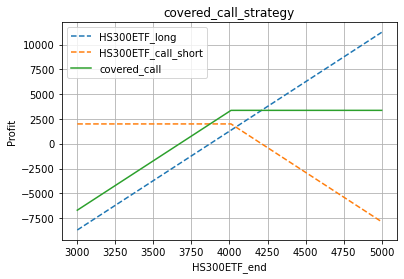

In [9]:
#抛补性看涨期权(卖出备兑看涨期权) 
import numpy as np
import matplotlib.pyplot as plt      
def covcall_short(C,K,P0,P0_index,Pt_index,N,N_call,N_underlying):
    '''C:当前期权价格；
    K:期权执行价格；
    P0:标的资产当前单位净值价格；
    P0_index：标的资产当前收盘点位；      
    Pt_index：期权到期日标的资产收盘点位；
    N:标的资产多头头寸数量；
    N_call：标的资产期权空头数量；
    N_underlying：1张标的资产期权基础资产是多少份单位净值.'''
    Pt = Pt_index*P0/P0_index #期权到期日标的资产基金净值数组
    long = N*(Pt-P0)#期权到期日标的资产多头头寸的盈亏
    call_short = N_call * N_underlying * (C-np.maximum(Pt-K,0))
    #期权到期日看涨期权空头头寸的盈亏
    return Pt_index,long,call_short,call_short+long  
    #期权到期日抛补性看涨期权策略的盈亏
       
A=covcall_short(C=0.2,K=4,P0=3.8630,P0_index=3872.7701,Pt_index=np.linspace(3000,5000,500),
                N=10000,N_call=1,N_underlying=10000) 

plt.plot(A[0],A[1],'--',label='HS300ETF_long')#沪深300ETF多头
plt.plot(A[0],A[2],'--',label='HS300ETF_call_short')#沪深300ETF看涨期权空头
plt.plot(A[0],A[3],label='covered_call')#抛补性看涨期权策略组合盈亏
plt.xlabel('HS300ETF_end')#沪深300指数收盘价
plt.ylabel('Profit')#组合盈亏金额
plt.title('covered_call_strategy')#抛补性看涨期权策略组合盈亏图
plt.legend()
plt.grid()

    
    
    
    
    

In [ ]:
【提示】接下来我们考虑对手方做相反方向的策略，则有卖出1股股票，
同时购买该股票的1股看涨期权的组合被称为“买入备兑看涨期权”。



In [ ]:
https://zhuanlan.zhihu.com/p/211166108
买入备兑看涨期权

mairubeidui ：-（ST-S0）  +  Max(ST-K,0)-C

     股票空头 +   欧式看涨期权的多头(如果ST>K,则行权；反之不行权)

ST:期权到期日基础资产的价格
S0:策略构建日的基础资产的价格
K：期权的执行价格
C：策略构建日看涨期权的价格

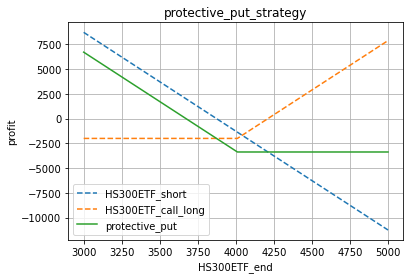

In [11]:
#买入备兑看涨期权
def covcall_long(C,K,P0,P0_index,Pt_index,N,N_call,N_underlying):
    '''C:当前期权价格；
    K:期权执行价格；
    P0:标的资产当前单位净值价格；
    P0_index：标的资产当前收盘点位；
    Pt_index：期权到期日标的资产收盘点位；
    N:标的资产多头头寸数量；
    N_call：标的资产期权空头数量；
    N_underlying：1张标的资产期权基础资产是多少份单位净值.'''    
    Pt=P0*Pt_index/P0_index  #期权到期日标的资产基金净值数组
    short=-N*(Pt-P0)   #期权到期日标的资产空头头寸的盈亏
    call_long=N_call*N_underlying*(np.maximum(Pt-K,0)-C)  #期权到期日看涨期权多头头寸的盈亏
    return Pt_index,short,call_long,call_long+short  #期权到期日策略的盈亏
       
B=covcall_long(C=0.2,K=4,P0=3.8630,P0_index=3872.7701,Pt_index=np.linspace(3000,5000,500),
                N=10000,N_call=1,N_underlying=10000)              
       
plt.plot(B[0],B[1],'--',label='HS300ETF_short')#沪深300ETF空头
plt.plot(B[0],B[2],'--',label='HS300ETF_call_long')#沪深300ETF看涨期权多头
plt.plot(B[0],B[3],label='mairubeidui')#买入备兑看涨期权策略组合盈亏
plt.xlabel('HS300ETF_end')#沪深300指数收盘价
plt.ylabel('profit')#组合盈亏金额
plt.title('mairubeidui_strategy')#买入备兑看涨期权策略组合盈亏
plt.legend()
plt.grid()  

In [ ]:
保护性看跌期权(protective put)
购买1股股票，同时购买该股票的1股看跌期权的组合称为保护性看跌期权。
保护性看跌期权，锁定了最低净收入和最低净损益，但是，同时净损益的预期也
因此降低了。


In [ ]:
https://zhuanlan.zhihu.com/p/211166108
买入保护性看跌期权(protective put)

pp ：ST-S0  +  Max(ST-K,0)-P

     股票多头 +   欧式看跌期权多头(ST>K行权，反之不行权)

ST:期权到期日基础资产的价格
S0:策略构建日的基础资产的价格
K：期权的执行价格
P：策略构建日看跌期权的价格

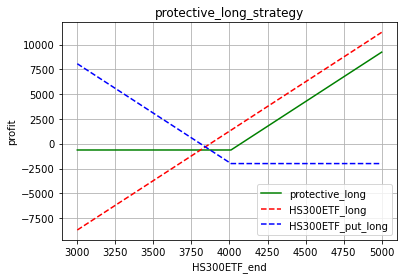

In [16]:
#买入保护性看跌期权策略 
def protective_long(P,K,P0,P0_index,Pt_index,N,N_put,N_underlying):
    '''P:当前期权价格；
    K:期权执行价格；
    P0:标的资产当前单位净值价格；
    P0_index：标的资产当前收盘点位；
    Pt_index：期权到期日标的资产收盘点位；
    N:标的资产多头头寸数量；
    N_put：标的资产期权空头数量；
    N_underlying：1张标的资产期权基础资产是多少份单位净值.'''  
    Pt = P0*Pt_index/P0_index  #期权到期日标的资产基金净值数组
    long = N*(Pt-P0)#期权到期日标的资产多头头寸的盈亏
    put_long = N_put*N_underlying*(np.maximum(K-Pt,0)-P)#期权到期日看跌期权多头头寸的盈亏
    return Pt_index,long,put_long,put_long+long#期权到期日买入保护性看跌期权策略的盈亏

C=protective_long(P=0.2,K=4,P0=3.8630,P0_index=3872.7701,Pt_index=np.linspace(3000,5000,500),
                N=10000,N_put=1,N_underlying=10000)  

plt.title('protective_long_strategy')
plt.xlabel('HS300ETF_end')
plt.ylabel('profit')
plt.plot(C[0],C[3],'g-',label='protective_long')#买入保护性看跌期权策略组合盈亏
plt.plot(C[0],C[1],'r--',label='HS300ETF_long')#沪深300ETF多头
plt.plot(C[0],C[2],'b--',label='HS300ETF_put_long')#沪深300ETF看跌期权多头
plt.legend()
plt.grid()


In [ ]:
【提示】接下来我们考虑对手方做相反方向的策略，则有卖出1股股票，
同时卖出该股票的1股看跌期权的组合被称为“卖出保护性看跌期权”。

In [ ]:
https://zhuanlan.zhihu.com/p/211166108
卖出保护性看跌期权(protective put)

pp ：-(ST-S0)  +   P-Max(K-ST,0)

     股票空头   +    欧式看跌期权空头(K>ST多头行权，反之不行权)

ST:期权到期日基础资产的价格
S0:策略构建日的基础资产的价格
K：期权的执行价格
P：策略构建日看跌期权的价格

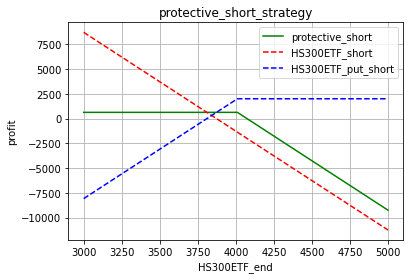

In [17]:
#卖出保护性看跌期权策略
def protective_short(P,K,P0,P0_index,Pt_index,N,N_put,N_underlying):
    '''P:当前期权价格；
    K:期权执行价格；
    P0:标的资产当前单位净值价格；
    P0_index：标的资产当前收盘点位；
    Pt_index：期权到期日标的资产收盘点位；
    N:标的资产多头头寸数量；
    N_put：标的资产期权空头数量；
    N_underlying：1张标的资产期权基础资产是多少份单位净值.'''  
    Pt=P0*Pt_index/P0_index  #期权到期日标的资产基金净值数组
    short = -N*(Pt-P0)#期权到期日标的资产空头头寸的收益
    put_short= N_put*N_underlying*(P-np.maximum(K-Pt,0)) #期权到期日看跌期权空头头寸的收益
    return Pt_index,short,put_short,put_short+short  #期权到期日卖出保护性看跌期权策略的收益

D=protective_short(P=0.2,K=4,P0=3.8630,P0_index=3872.7701,Pt_index=np.linspace(3000,5000,500),
                N=10000,N_put=1,N_underlying=10000)   

plt.title('protective_short_strategy')
plt.xlabel('HS300ETF_end')
plt.ylabel('profit')
plt.plot(D[0],D[3],'g-',label='protective_short')#卖出保护性看跌期权策略组合盈亏
plt.plot(D[0],D[1],'r--',label='HS300ETF_short')#沪深300ETF空头
plt.plot(D[0],D[2],'b--',label='HS300ETF_put_short')#沪深300ETF看跌期权空头
plt.legend()
plt.grid()

    
    
